<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/Perevozki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from  google.colab import files
import matplotlib.pyplot as plt

In [ ]:
files.upload()
df = pd.read_csv('task19.csv', encoding='cp1251', delimiter=';')

Saving task19.csv to task19.csv


In [ ]:
df[:3]

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830


<BarContainer object of 8 artists>

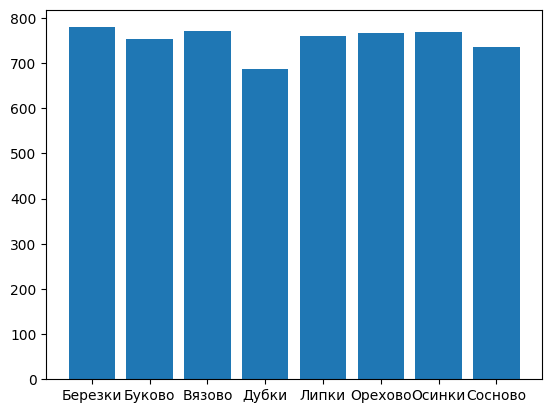

In [ ]:
average_mass = df.groupby('Пункт назначения')['Масса груза'].mean().reset_index(name='Средняя масса груза')
average_mass
plt.bar(average_mass['Пункт назначения'], average_mass['Средняя масса груза'])

Text(0.5, 1.0, 'Суммарный расход бензина по датам по всем направлениям')

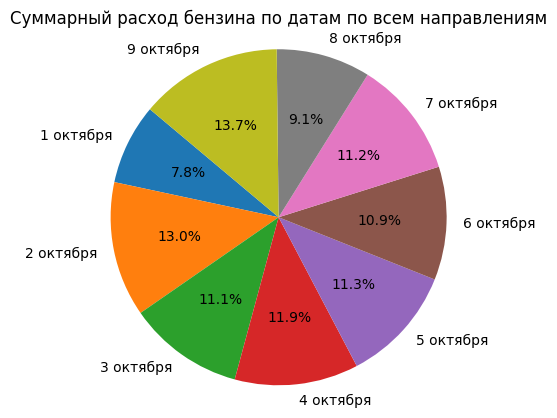

In [ ]:
grouped_data = df.groupby('Дата')['Расход бензина'].sum()
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Суммарный расход бензина по датам по всем направлениям')


<Axes: xlabel='Пункт назначения'>

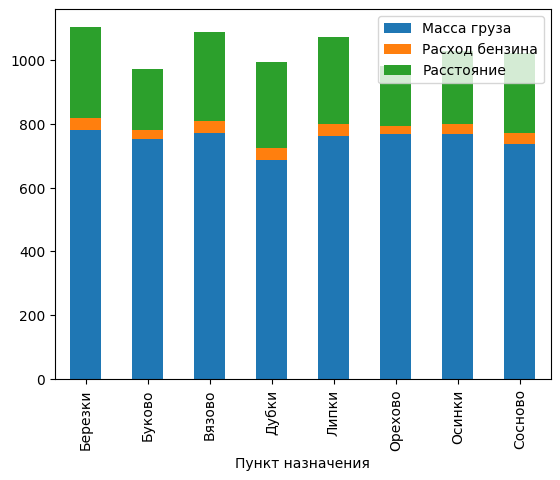

In [ ]:
grouped_mass_df= df.groupby('Пункт назначения')['Масса груза'].mean()
grouped_oil_df = df.groupby('Пункт назначения')['Расход бензина'].mean()
grouped_dist_df = df.groupby('Пункт назначения')['Расстояние'].mean()
grouped_mass_n_oil_df = pd.merge(grouped_mass_df, grouped_oil_df, on='Пункт назначения')
grouped_df = pd.merge(grouped_mass_n_oil_df, grouped_dist_df, on='Пункт назначения')
grouped_df.plot(kind='bar', stacked=True )